# TP2

## Exercice 1

### Importations

In [1]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import netCDF4
g16nc = netCDF4.Dataset("Guyane/OR_ABI-L1b-RadReg-M6C03_G16_s20220022000206_e20220022009514_c20220022009562.nc", 'r')

In [3]:
#Attribut
g16nc.data_model

'NETCDF4'

In [4]:
g16nc.ncattrs()

['naming_authority',
 'Conventions',
 'standard_name_vocabulary',
 'institution',
 'project',
 'production_site',
 'production_environment',
 'spatial_resolution',
 'Metadata_Conventions',
 'orbital_slot',
 'platform_ID',
 'instrument_type',
 'scene_id',
 'instrument_ID',
 'summary',
 'keywords',
 'keywords_vocabulary',
 'iso_series_metadata_id',
 'license',
 'processing_level',
 'cdm_data_type',
 'dataset_name',
 'production_data_source',
 'timeline_id',
 'date_created',
 'time_coverage_start',
 'time_coverage_end',
 'LUT_Filenames',
 'id',
 'title',
 'extracted_region']

### Résolution spatiale

In [5]:
g16nc.spatial_resolution

'1km at nadir'

### Dates
#### Format YYYY-MM-DD ainsi que l'horaire THH:MM:SS.sZ

In [6]:
print(g16nc.date_created, g16nc.time_coverage_start, g16nc.time_coverage_end)

2022-01-02T20:09:56.2Z 2022-01-02T20:00:20.6Z 2022-01-02T20:09:51.4Z


### Extraction date

In [8]:
int(g16nc.time_coverage_start[0:4])
##Conversion à l'aide de la bibliothèque datetime
import datetime
ds = datetime.datetime.strptime(g16nc.time_coverage_start,
'%Y-%m-%dT%H:%M:%S.%fZ').timetuple()
#Année
ds.tm_year

2022

### Variables

In [18]:
#Affichage des noms des variables
print(g16nc.variables.keys())
g16nc['x_image']

dict_keys(['Rad', 'DQF', 't', 'y', 'x', 'time_bounds', 'goes_imager_projection', 'y_image', 'y_image_bounds', 'x_image', 'x_image_bounds', 'nominal_satellite_subpoint_lat', 'nominal_satellite_subpoint_lon', 'nominal_satellite_height', 'geospatial_lat_lon_extent', 'yaw_flip_flag', 'band_id', 'band_wavelength', 'esun', 'kappa0', 'planck_fk1', 'planck_fk2', 'planck_bc1', 'planck_bc2', 'valid_pixel_count', 'missing_pixel_count', 'saturated_pixel_count', 'undersaturated_pixel_count', 'focal_plane_temperature_threshold_exceeded_count', 'min_radiance_value_of_valid_pixels', 'max_radiance_value_of_valid_pixels', 'mean_radiance_value_of_valid_pixels', 'std_dev_radiance_value_of_valid_pixels', 'maximum_focal_plane_temperature', 'focal_plane_temperature_threshold_increasing', 'focal_plane_temperature_threshold_decreasing', 'percent_uncorrectable_L0_errors', 'earth_sun_distance_anomaly_in_AU', 'algorithm_dynamic_input_data_container', 'processing_parm_version_container', 'algorithm_product_version

<class 'netCDF4._netCDF4.Variable'>
float32 x_image()
    long_name: GOES-R fixed grid projection x-coordinate center of image
    standard_name: projection_x_coordinate
    units: rad
    axis: X
unlimited dimensions: 
current shape = ()
filling on, default _FillValue of 9.969209968386869e+36 used

In [14]:
#Attributs de la variable Rad
print(g16nc.variables['Rad'].ncattrs())

['_FillValue', 'long_name', 'standard_name', '_Unsigned', 'sensor_band_bit_depth', 'valid_range', 'scale_factor', 'add_offset', 'units', 'resolution', 'coordinates', 'grid_mapping', 'cell_methods', 'ancillary_variables']


In [16]:
#Contenu de l'attribut long_name de la variable Rad
print(g16nc.variables['Rad'].long_name)

ABI L1b Radiances


### Fermer objet

In [10]:
#Fermeture de l'objet Dataset
#g16nc.close()

### Contenu matrice

In [22]:
g16nc.variables['Rad'].valid_range

array([   0, 1022], dtype=int16)

In [27]:
g16nc.variables['Rad'][:]

masked_array(
  data=[[ 14.723146 ,  12.461672 ,   7.9387207, ...,  15.853884 ,
          18.869184 ,  31.307297 ],
        [ 33.19186  ,  25.65361  ,  16.230797 , ...,   9.446371 ,
          50.152924 ,  78.421364 ],
        [ 41.483936 ,  35.076424 ,  38.468636 , ...,   4.92342  ,
          80.68284  , 108.95128  ],
        ...,
        [ 38.84555  ,  39.22246  ,  38.84555  , ...,  86.71344  ,
          66.36016  ,  50.90675  ],
        [ 39.22246  ,  38.468636 ,  39.22246  , ...,  76.91371  ,
          70.12929  ,  53.92205  ],
        [ 39.22246  ,  39.22246  ,  40.3532   , ...,  58.821915 ,
          62.96795  ,  48.268364 ]],
  mask=False,
  fill_value=1e+20,
  dtype=float32)

### Type matrice

In [29]:
type(g16nc.variables['Rad'][:])

numpy.ma.core.MaskedArray

### Contenu rad

In [34]:
g16nc.variables['Rad'][:].dtype

dtype('float32')

### Taille matrice

In [33]:
g16nc['Rad'].shape

(437, 407)

### DQF

In [37]:
g16nc['DQF']

<class 'netCDF4._netCDF4.Variable'>
int8 DQF(y, x)
    _FillValue: -1
    long_name: ABI L1b Radiances data quality flags
    standard_name: status_flag
    _Unsigned: true
    valid_range: [0 4]
    units: 1
    coordinates: band_id band_wavelength t y x
    grid_mapping: goes_imager_projection
    cell_methods: t: point area: point
    flag_values: [0 1 2 3 4]
    flag_meanings: good_pixel_qf conditionally_usable_pixel_qf out_of_range_pixel_qf no_value_pixel_qf focal_plane_temperature_threshold_exceeded_qf
    number_of_qf_values: 5
    percent_good_pixel_qf: 0.9999676
    percent_conditionally_usable_pixel_qf: 2e-07
    percent_out_of_range_pixel_qf: 2.55e-05
    percent_no_value_pixel_qf: 6.7e-06
    percent_focal_plane_temperature_threshold_exceeded_qf: 0.0
unlimited dimensions: 
current shape = (437, 407)
filling on

In [41]:
import matplotlib.pyplot as plt

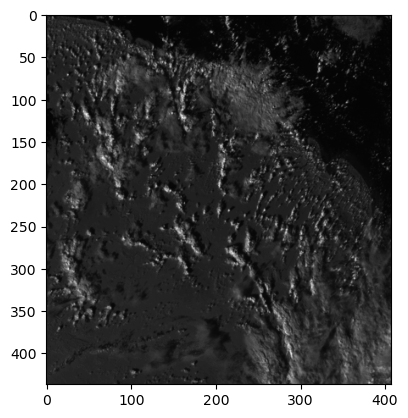

In [44]:
plt.imshow(g16nc['Rad'][:], cmap='gray')

### Exercice 2

#### Coordonnéee grille fixe 
#### coordonnées centre du point

#### Image couleur, si la center wavelength d'un channel tombe dans l'intervalle d'une couleur, il lui appartient
#### Rouge = 0.455-0.492 CO1(Channel 1)
#### Vert = 0.492-0.577 (Pas de channel)
#### Bleu = 0.622-0.780 CO2(Channel 2)
